# Preparation

In [1]:
import numpy as np
from matplotlib import pyplot as plt

We load the MDS data and append the label column to the MDS

In [2]:
mds = np.load('../traj/mds/mds_pos.npz')['arr_0']
mds_labels = np.load('../traj/mds/mds_labels.npz')['arr_0']
big_traj = np.load('../traj/mds/big_traj.npz')['arr_0']

print('MDS shape:', mds.shape)
print('MDS labels shape:', mds_labels.shape)
print('Big traj shape:', big_traj.shape)

MDS shape: (19113, 2)
MDS labels shape: (19113,)
Big traj shape: (19113, 2, 2000)


In [3]:
# Append the labels to the MDS coordinates
mds = np.hstack((mds, mds_labels.reshape(-1, 1)))

In [4]:
print('New MDS shape:', mds.shape)
print('First column: MDS X, second column: MDS Y, third column: labels')

New MDS shape: (19113, 3)
First column: MDS X, second column: MDS Y, third column: labels


We get the cluster mean for each cluster

In [5]:
def get_cluster_means(mds_with_labels):
    """Returns the mean of each cluster in the MDS coordinates"""
    labels_id = np.unique(mds_with_labels[:, 2])
    means = []
    for i in range(len(labels_id)):
        means.append(np.mean(mds_with_labels[mds_with_labels[:, 2] == i], axis=0))
    return np.array(means), labels_id

mds_means, labels_id = get_cluster_means(mds) # this will allow us to quickly perform likelihood computation

This function will return the nearest real MDS from the data given any (fictional) MDS vector 

In [6]:
def get_nearest_neighbor(data, x):
    """Returns the index of the nearest neighbor of x in data"""
    return np.argmin(np.linalg.norm(data[:,:2] - x, axis=1))

In [7]:
def sample_some_trajectories_with_label(label_id, N = 10):
    """Samples N trajectories with label label_id"""
    traj_with_label = big_traj[mds_labels == label_id, :, :]
    return traj_with_label[np.random.choice(traj_with_label.shape[0], N, replace=False)]

Let's plot all the cluster means in the time domain

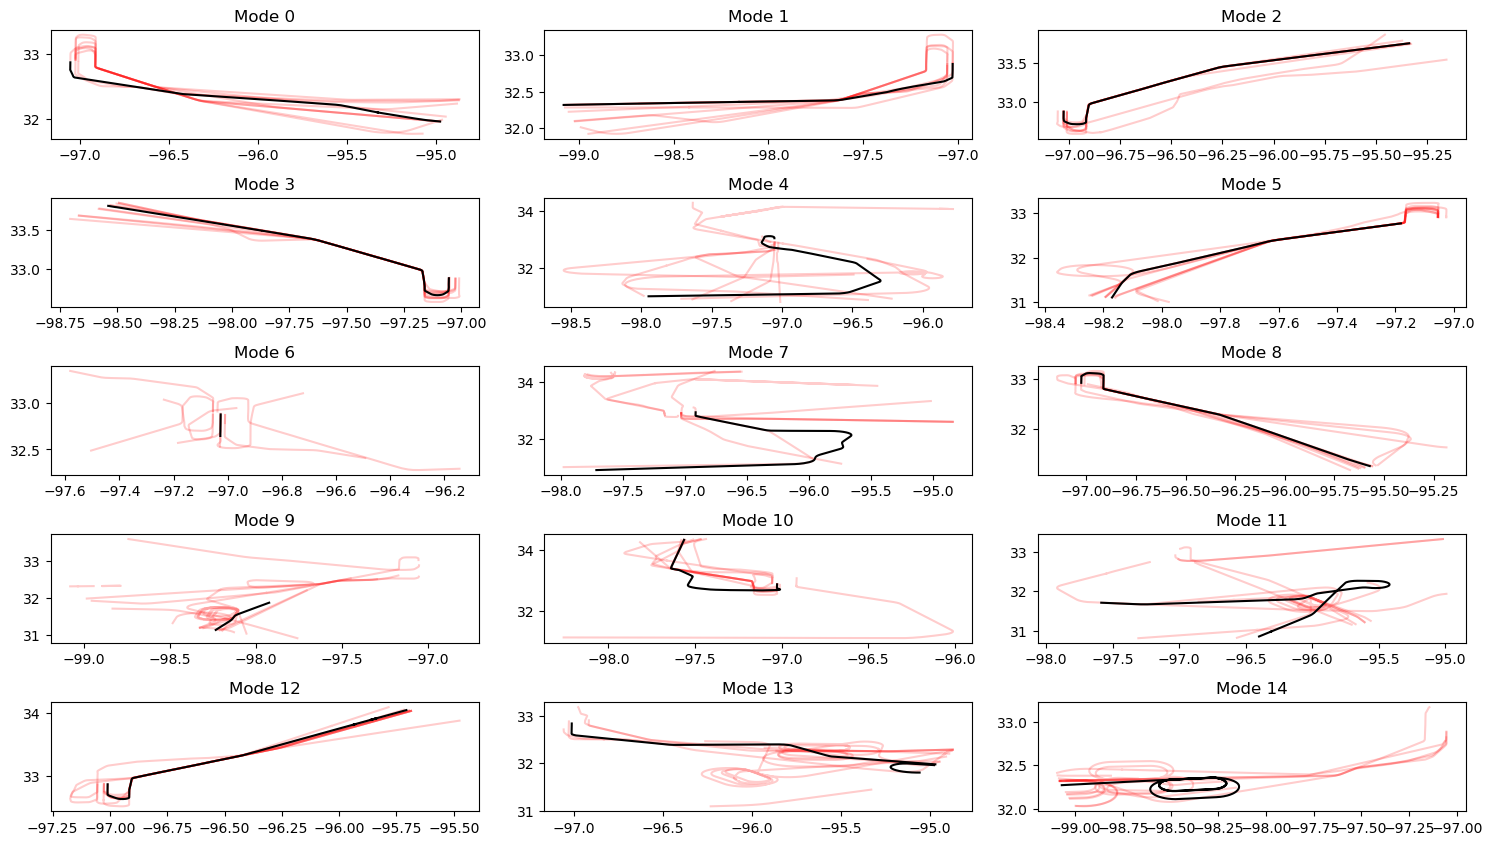

In [9]:
def plot_approach_modes(mds_means, mds, td_traj): # td_traj is the time domain trajectory, loaded from small_traj.npz
    plt.figure(figsize=(15, 10))
    for i in range(mds_means.shape[0]):
        mds_mean = mds_means[i,:2]
        mds_mean_label = mds_means[i,2]

        #print('MDS means:', mds_mean)
        #print('MDS means label:', mds_mean_label)
        
        nearest_mds_index = get_nearest_neighbor(mds, mds_mean)

        #print('Nearest MDS index:', nearest_mds_index)
        #print('Nearest MDS:', mds[nearest_mds_index,:2])

        nearest_td_traj = td_traj[nearest_mds_index, :, :] # mean trajectory

        traj_samples_with_label = sample_some_trajectories_with_label(mds_mean_label, N=10)

        plt.subplot(mds_means.shape[0]//3 + 1, 3, i+1)
        plt.title('Mode ' + str(int(mds_mean_label)))
        for j in range(traj_samples_with_label.shape[0]):
            plt.plot(traj_samples_with_label[j, 1, :], traj_samples_with_label[j, 0, :], 'r', alpha=0.2)
        plt.plot(nearest_td_traj[1, :], nearest_td_traj[0, :], 'k')
        

    plt.tight_layout()

plot_approach_modes(mds_means, mds, big_traj)
